In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [120]:
data = pd.read_csv('kc2_csv.csv')

In [121]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,no
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,yes
2,415.0,59.0,50.0,51.0,1159.0,8411.31,0.01,103.53,81.24,870848.58,...,359,35,9,10,47.0,106.0,692.0,467.0,106.0,yes
3,230.0,33.0,10.0,16.0,575.0,3732.82,0.03,39.82,93.74,148644.06,...,174,15,34,5,23.0,67.0,343.0,232.0,65.0,yes
4,175.0,26.0,12.0,13.0,500.0,3123.96,0.03,29.48,105.96,92103.07,...,142,7,19,4,18.0,58.0,310.0,190.0,51.0,yes


In [122]:

# data["output"].replace({"True": 1, "False": 0}, inplace=True)

In [123]:
data.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02,...,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,36.894828,4.893487,2.447126,3.650192,94.630843,555.472644,0.274464,9.735287,28.320441,1.854299e+04,...,1094.811456,27.772031,2.000000,4.339080,0.281609,9.197701,14.465900,57.611494,37.023372,8.765134
std,77.944048,10.976772,6.665003,8.054860,233.230165,1817.468320,0.275609,11.088640,32.225597,1.132712e+05,...,7556.521581,64.431485,5.582052,9.214753,1.038236,6.360180,22.086661,142.990741,90.398620,21.942779
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,4.000000,1.000000,1.000000,1.000000,5.000000,11.610000,0.060000,1.500000,7.740000,1.741000e+01,...,0.970000,2.000000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,2.000000,1.000000
50%,13.000000,2.000000,1.000000,2.000000,27.000000,109.205000,0.140000,6.000000,20.560000,6.135900e+02,...,34.090000,8.000000,0.000000,1.000000,0.000000,8.000000,7.000000,16.500000,11.000000,3.000000
75%,45.000000,5.000000,1.000000,4.000000,104.750000,543.787500,0.500000,14.610000,38.365000,7.624085e+03,...,423.562500,33.750000,2.000000,5.000000,0.000000,14.000000,20.000000,64.000000,41.000000,9.000000
max,1275.000000,180.000000,125.000000,143.000000,3982.000000,33814.560000,2.000000,103.530000,415.060000,2.147484e+06,...,153047.010000,1107.000000,44.000000,121.000000,11.000000,47.000000,325.000000,2469.000000,1513.000000,361.000000


In [124]:
data.isna().count()

loc                 522
v(g)                522
ev(g)               522
iv(g)               522
n                   522
v                   522
l                   522
d                   522
i                   522
e                   522
b                   522
t                   522
lOCode              522
lOComment           522
lOBlank             522
lOCodeAndComment    522
uniq_Op             522
uniq_Opnd           522
total_Op            522
total_Opnd          522
branchCount         522
problems            522
dtype: int64

In [125]:
data.head(10)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,no
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,yes
2,415.0,59.0,50.0,51.0,1159.0,8411.31,0.01,103.53,81.24,870848.58,...,359,35,9,10,47.0,106.0,692.0,467.0,106.0,yes
3,230.0,33.0,10.0,16.0,575.0,3732.82,0.03,39.82,93.74,148644.06,...,174,15,34,5,23.0,67.0,343.0,232.0,65.0,yes
4,175.0,26.0,12.0,13.0,500.0,3123.96,0.03,29.48,105.96,92103.07,...,142,7,19,4,18.0,58.0,310.0,190.0,51.0,yes
5,163.0,16.0,13.0,11.0,440.0,2714.77,0.03,32.25,84.14,87589.65,...,139,2,20,0,19.0,53.0,260.0,180.0,31.0,yes
6,152.0,11.0,6.0,11.0,432.0,2629.78,0.03,31.68,83.01,83311.56,...,114,18,17,0,18.0,50.0,256.0,176.0,21.0,yes
7,3.0,1.0,1.0,1.0,1.0,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,1.0,0.0,1.0,0.0,1.0,no
8,14.0,2.0,1.0,2.0,22.0,88.00,0.17,5.79,15.21,509.14,...,8,0,1,0,9.0,7.0,13.0,9.0,3.0,no
9,10.0,2.0,1.0,2.0,18.0,64.53,0.14,7.00,9.22,451.71,...,8,0,0,0,8.0,4.0,11.0,7.0,3.0,no


In [126]:
data['problems'].value_counts()

no     415
yes    107
Name: problems, dtype: int64

Text(0.5, 1.0, 'problems')

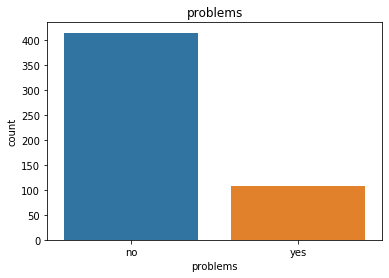

In [127]:
import seaborn as sns 
sns.countplot(data['problems']).set_title('problems')

In [128]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# print(scaler.fit(data))

In [129]:
X= data.drop(['problems'], axis = 1) 
Y= data['problems']

In [130]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # normalizing the featu

In [131]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(["problems"], axis=1), data["problems"],
                                                    random_state=10, test_size=0.25)

In [132]:
x_train.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
326,10.0,2.0,1.0,2.0,18.0,64.53,0.14,7.00,9.22,451.71,...,25.09,8,0,0,0,8.0,4.0,11.0,7.0,3.0
373,29.0,5.0,1.0,3.0,70.0,336.51,0.10,9.71,34.67,3266.17,...,181.45,22,0,5,0,11.0,17.0,40.0,30.0,9.0
518,4.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,0.67,2,0,0,0,3.0,1.0,3.0,1.0,1.0
311,30.0,2.0,1.0,2.0,63.0,292.56,0.10,9.82,29.79,2873.39,...,159.63,19,1,8,0,11.0,14.0,38.0,25.0,3.0
111,188.0,8.0,4.0,5.0,509.0,3451.71,0.05,19.10,180.68,65942.86,...,3663.49,136,9,40,0,19.0,91.0,326.0,183.0,15.0


In [133]:
y_test.head()

252     no
68      no
519    yes
129     no
24      no
Name: problems, dtype: object

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [135]:
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
logit_pred = logit.predict(x_test)

In [137]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,no,yes,All
Actual,,,
no,22,3,25
yes,1,1,2
All,23,4,27


In [138]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
# print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
# print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

In [139]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({'no': 415, 'yes': 107})
New dataset shape Counter({'no': 415, 'yes': 415})


In [140]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X))

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
logit_pred = logit.predict(X_test)

In [143]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,no,yes,All
Actual,,,
no,14,13,27
yes,1,2,3
All,15,15,30


In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred,labels=['yes','no'], average='micro')))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred,labels=['yes','no'], average='micro')))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred,labels=['yes','no'], average='micro')
recall_logit = recall_score(y_test, logit_pred,labels=['yes','no'], average='micro')
# auc_logit = roc_auc_score(y_test, logit_pred)

Accuracy is 0.79
Precision is 0.79
Recall is 0.79


In [145]:
##Decision treee

In [146]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({'no': 415, 'yes': 107})
New dataset shape Counter({'no': 415, 'yes': 415})


In [147]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=28, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [148]:
dtree_pred = dtree.predict(X_test)

In [149]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,no,yes,All
Actual,,,
no,13,14,27
yes,1,2,3
All,14,16,30


In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred,labels=['yes','no'], average='micro')))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred,labels=['yes','no'], average='micro')))
# print("AUC is {0:.2f}".format(roc_auc_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred,labels=['yes','no'], average='micro')
recall_dtree = recall_score(y_test, dtree_pred,labels=['yes','no'], average='micro')
# auc_dtree = roc_auc_score(y_test, dtree_pred)

Accuracy is 0.81
Precision is 0.81
Recall is 0.81


In [151]:
# # Create list of top most features based on importance
# feature_names = X_train.columns
# feature_imports = dtree.feature_importances_
# most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
# most_imp_features.sort_values(by="Importance", inplace=True)
# print(most_imp_features)
# plt.figure(figsize=(10,6))
# plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
# plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
# plt.xlabel('Importance')
# plt.title('Most important features - Decision Tree')
# plt.show()

In [152]:
### Random Forest

In [153]:

seed = 7

# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=seed)

Original dataset shape Counter({'no': 415, 'yes': 107})
New dataset shape Counter({'no': 415, 'yes': 415})


In [154]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 20, max_depth=30, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [155]:
rm_prd = rm.predict(X_test)

In [156]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,no,yes,All
Actual,,,
no,14,17,31
All,14,17,31


In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd,labels=['yes','no'], average='micro')))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd,labels=['yes','no'], average='micro')))
# print("AUC is {0:.2f}".format(roc_auc_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd,labels=['yes','no'], average='micro')
recall_rm = recall_score(y_test, rm_prd,labels=['yes','no'], average='micro')
# auc_rm = roc_auc_score(y_test, rm_prd)

Accuracy is 0.89
Precision is 0.89
Recall is 0.89


In [158]:
###adaboost

In [159]:
# Data balancing applied using SMOTE
seed = 7

from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=seed)

Original dataset shape Counter({'no': 415, 'yes': 107})
New dataset shape Counter({'no': 415, 'yes': 415})


In [160]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 2000)

In [161]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=2000, random_state=None)

In [162]:
ada_pred = ada.predict(X_test)

In [163]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(ada_pred, name = 'Predict'), margins = True)

Predict,no,yes,All
Actual,,,
no,14,17,31
All,14,17,31


In [164]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, ada_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, ada_pred,labels=['yes','no'], average='micro')))
print("Recall is {0:.2f}".format(recall_score(y_test, ada_pred,labels=['yes','no'], average='micro')))
# print("AUC is {0:.2f}".format(roc_auc_score(y_test, ada_pred)))

accuracy_ada = accuracy_score(y_test, ada_pred)
precision_ada = precision_score(y_test, ada_pred,labels=['yes','no'], average='micro')
recall_ada = recall_score(y_test, ada_pred,labels=['yes','no'], average='micro')
# auc_ada = roc_auc_score(y_test, ada_pred)

Accuracy is 0.90
Precision is 0.90
Recall is 0.90


In [165]:
#XGBOOST

In [166]:
seed = 7
# test_size = 0.33
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=seed)

Original dataset shape Counter({'no': 415, 'yes': 107})
New dataset shape Counter({'no': 415, 'yes': 415})


In [167]:
# fit model no training data
model = XGBClassifier(n_estimators = 1500)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [168]:

# make predictions for test data
y_pred = model.predict(X_test)


In [169]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred,labels=['yes','no'], average='micro')))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred,labels=['yes','no'], average='micro')))
# print("AUC is {0:.2f}".format(roc_auc_score(y_test, predictions)))

accuracy_xg = accuracy_score(y_test, y_pred)
precision_xg = precision_score(y_test, y_pred,labels=['yes','no'], average='micro')
recall_xg = recall_score(y_test, y_pred,labels=['yes','no'], average='micro')
# auc_xg = roc_auc_score(y_test, predictions)

Accuracy is 0.92
Precision is 0.92
Recall is 0.92


In [170]:
### Model comparision

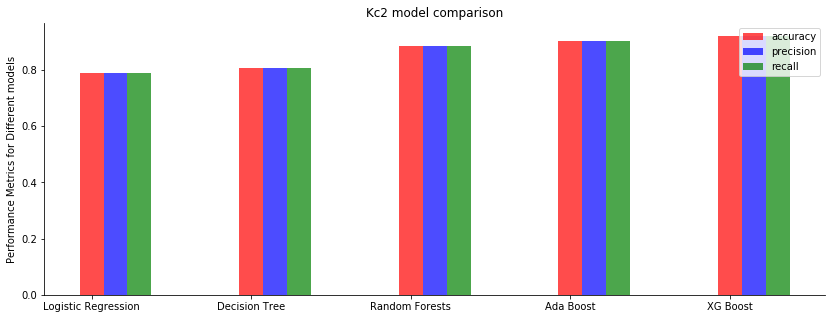

In [171]:
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [accuracy_logit, accuracy_dtree, accuracy_rm, accuracy_ada,accuracy_xg]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [precision_logit, precision_dtree, precision_rm, precision_ada,precision_xg]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [recall_logit, recall_dtree, recall_rm, recall_ada,recall_xg]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)




plt.ylabel('Performance Metrics for Different models')
plt.title('Kc2 model comparison')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()       